In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [5]:
# view the columns in training data
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# view top rows to understand training data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (1460, 81)
Test: (1459, 80)


In [8]:
# set target (y) 
y = train_data.SalePrice
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [9]:
# view the data types (we )
train_data.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [10]:
# isolate numerical data and categorical data
numerical_data = train_data.select_dtypes(exclude='object').drop('SalePrice', axis=1).drop('Id',axis=1)
categorical_data = train_data.select_dtypes(include='object')

print('Numerical:', len(numerical_data.columns), '  Categorical:', len(categorical_data.columns), '\n')

print('Numerical:', numerical_data.columns,'\n\n', '  Categorical:', categorical_data.columns)

Numerical: 36   Categorical: 43 

Numerical: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object') 

   Categorical: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFi

In [11]:
# describe the numerical data
numerical_data.describe().round(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,...,473.0,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8
std,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,161.3,...,213.8,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
25%,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,...,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
50%,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,...,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
75%,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,...,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


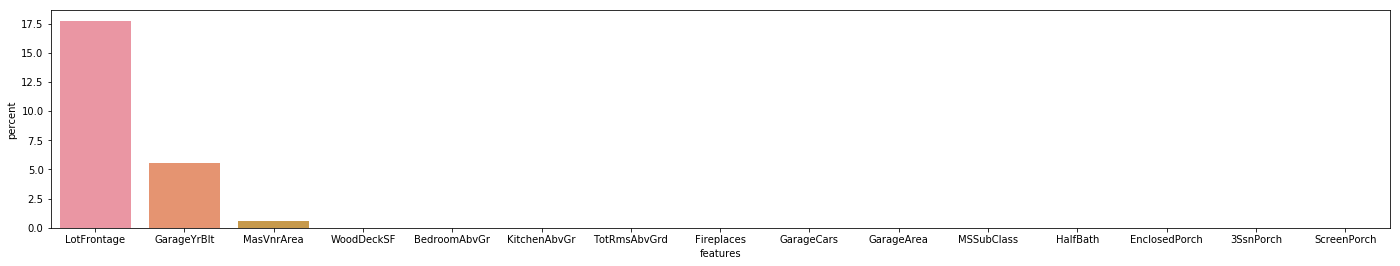

In [21]:
# find proportion of numerical which has missing values

plt.figure(figsize=(24,4))

missing_percent = pd.DataFrame(numerical_data.isnull().sum()*100/numerical_data.shape[0], columns=['percent']).sort_values(by=['percent'],
                                                                ascending=False).head(15).reset_index()

missing_percent.columns = ['features','percent']
sns.barplot(x='features', y='percent', data = missing_percent)

In [13]:
# there are a number of missing values - use an imputer to to replace missing values with mean
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(missing_values=np.nan)

imp_numerical_data = pd.DataFrame(my_imputer.fit_transform(numerical_data))

# imputer removed column names; put them back

imp_numerical_data.columns = numerical_data.columns

# describe and compare with original data
imp_numerical_data.describe().round(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,46.5,...,473.0,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8
std,42.3,22.0,9981.3,1.4,1.1,30.2,20.6,180.6,456.1,161.3,...,213.8,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
25%,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,...,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
50%,50.0,70.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,...,480.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
75%,70.0,79.0,11601.5,7.0,6.0,2000.0,2004.0,164.2,712.2,0.0,...,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


In [14]:
# investigate correlations between some key variables
train_data[['LotArea','YearBuilt','OverallQual','FullBath','PoolArea','GarageArea','SalePrice']].corr()

,LotArea,YearBuilt,OverallQual,FullBath,PoolArea,GarageArea,SalePrice
LotArea,1.000000,0.014228,0.105806,0.126031,0.077672,0.180403,0.263843
YearBuilt,0.014228,1.000000,0.572323,0.468271,0.004950,0.478954,0.522897
OverallQual,0.105806,0.572323,1.000000,0.550600,0.065166,0.562022,0.790982
FullBath,0.126031,0.468271,0.550600,1.000000,0.049604,0.405656,0.560664
PoolArea,0.077672,0.004950,0.065166,0.049604,1.000000,0.061047,0.092404
GarageArea,0.180403,0.478954,0.562022,0.405656,0.061047,1.000000,0.623431
SalePrice,0.263843,0.522897,0.790982,0.560664,0.092404,0.623431,1.000000


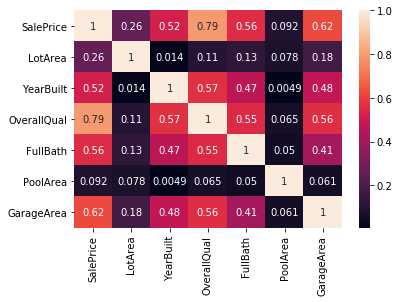

In [15]:
ax = sns.heatmap(train_data[['SalePrice','LotArea','YearBuilt','OverallQual','FullBath','PoolArea','GarageArea']].corr(), annot=True)

In [16]:
# separate into continuous and discrete data

numerical_disc = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

numerical_cont = []

for i in imp_numerical_data.columns:
    if i not in numerical_disc:
        numerical_cont.append(i)

print('Discrete:', numerical_disc, "\n")
print('Continuous:', numerical_cont)

Discrete: ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold'] 

Continuous: ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


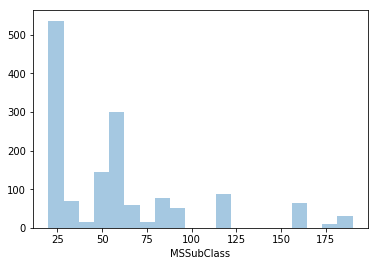

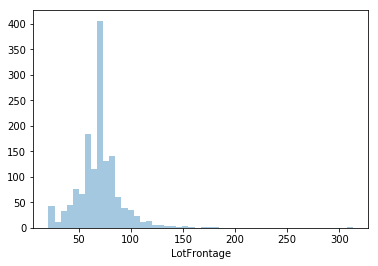

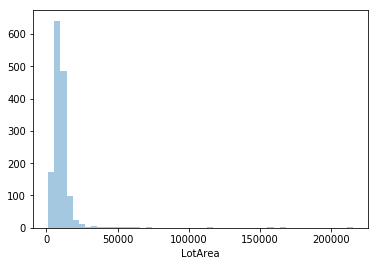

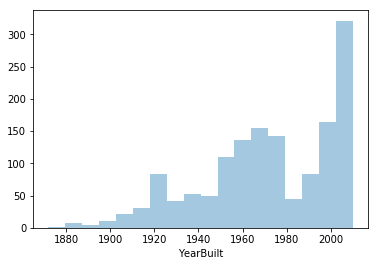

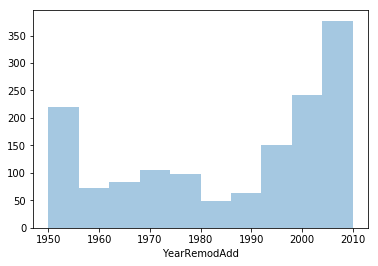

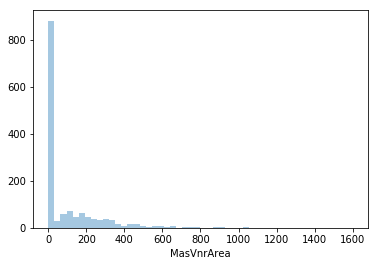

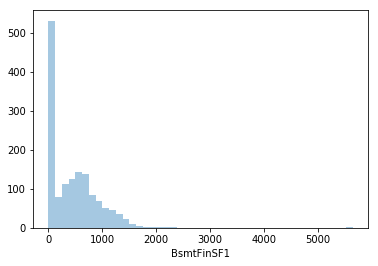

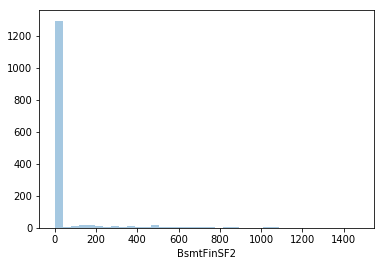

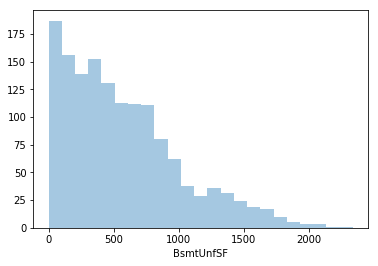

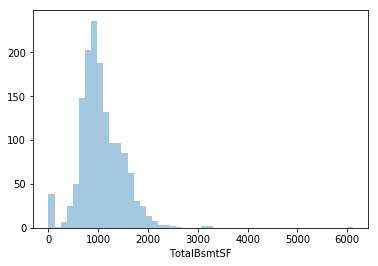

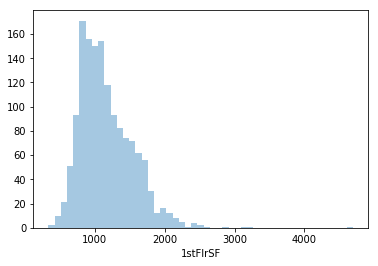

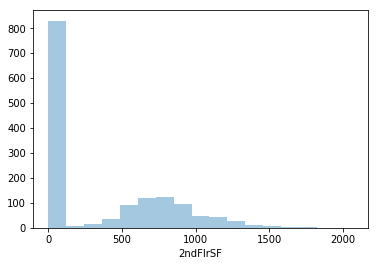

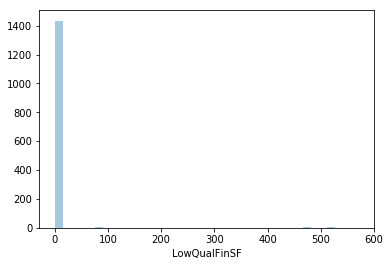

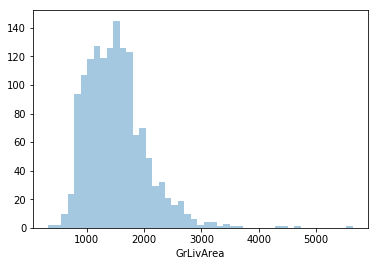

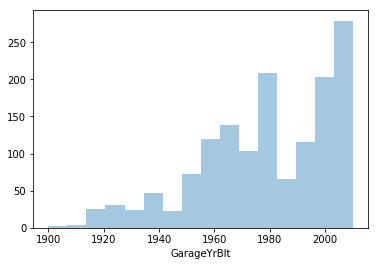

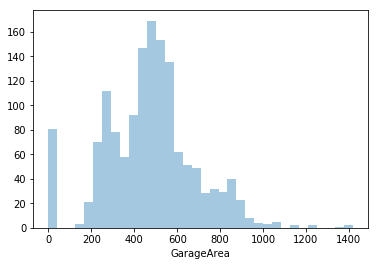

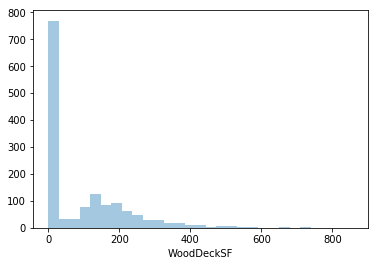

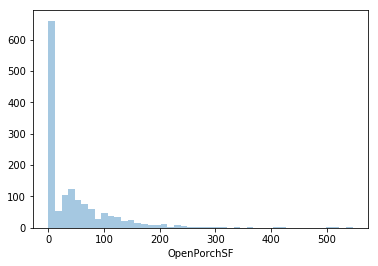

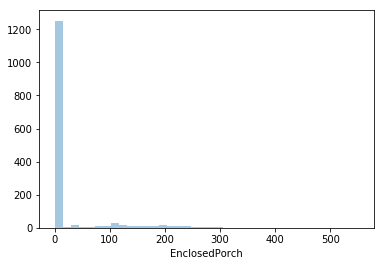

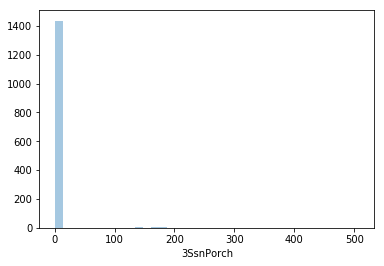

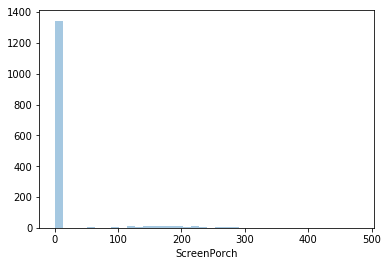

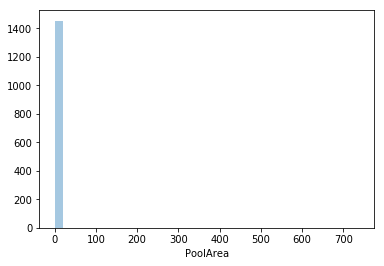

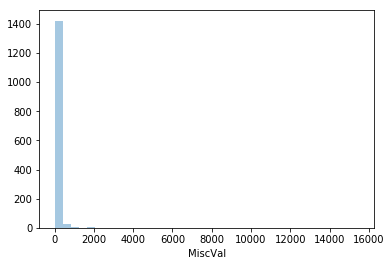

In [17]:
# check the values in the numerical continuous dataset 

for f in numerical_cont:
    sns.distplot(imp_numerical_data[f], kde=False)
    plt.show()

# this shows features which have mostly single values - these can be removed later

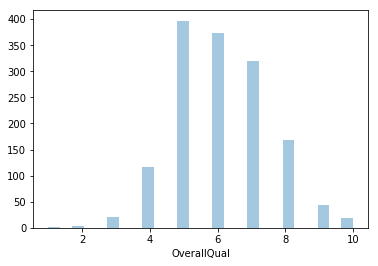

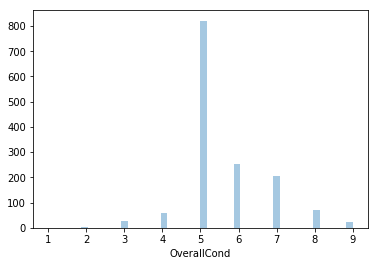

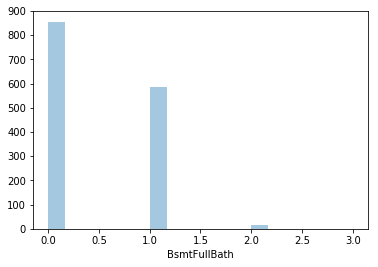

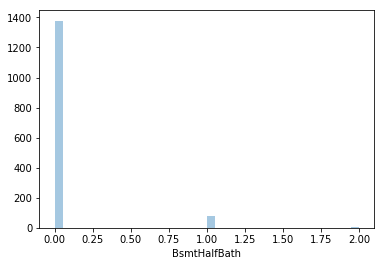

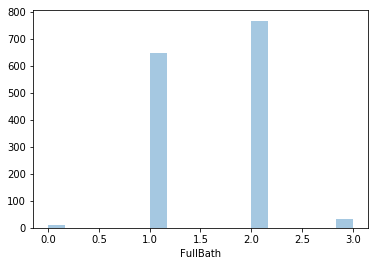

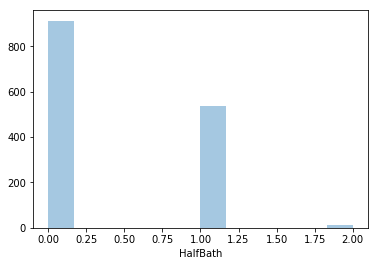

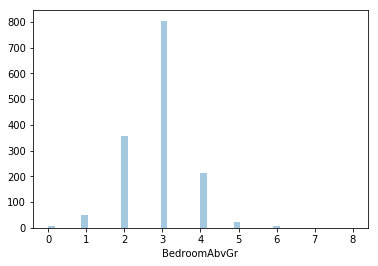

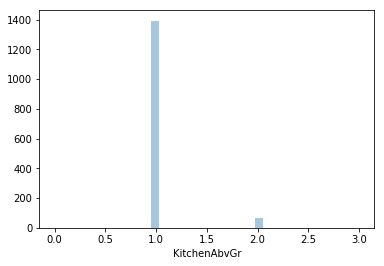

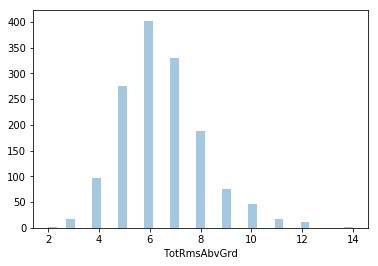

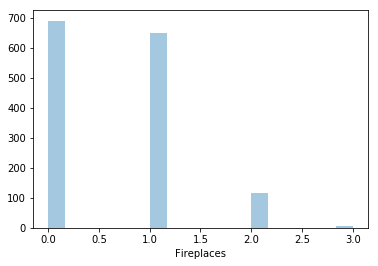

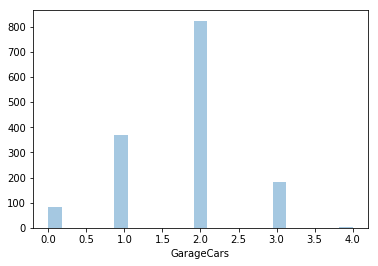

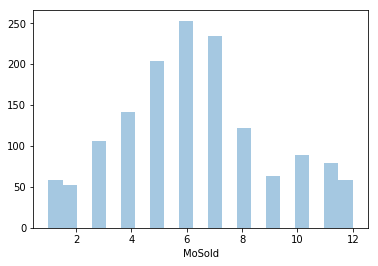

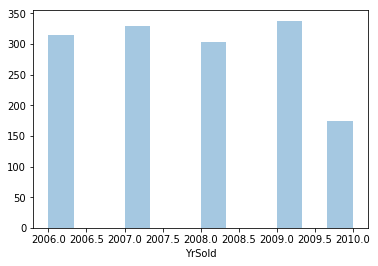

In [18]:
# check the values in the numerical discrete dataset 

for f in numerical_disc:
    sns.distplot(imp_numerical_data[f], kde=False)
    plt.show()
    
# this shows features which have mostly single values which will be less useful and can be removed

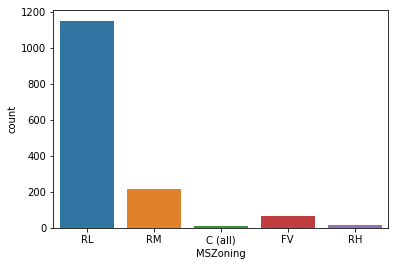

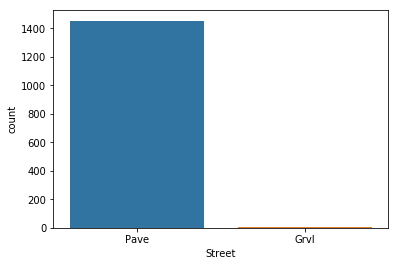

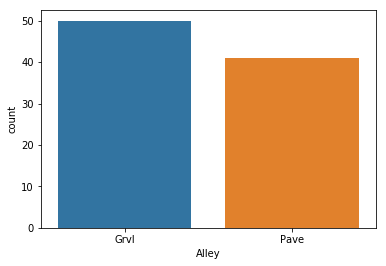

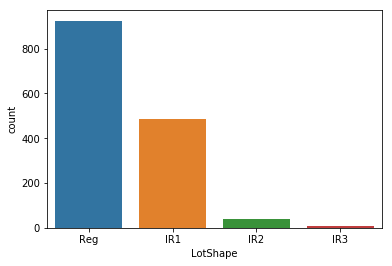

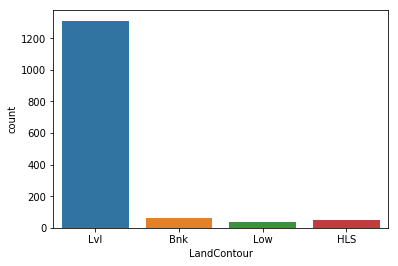

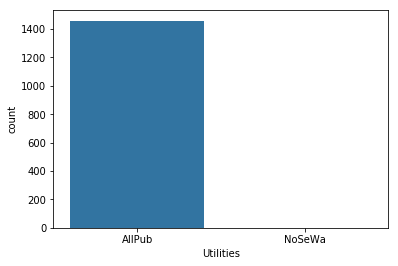

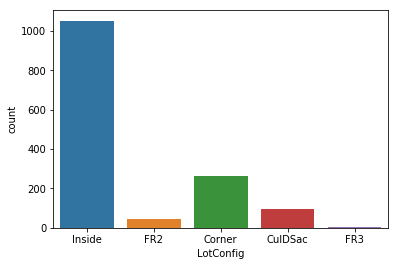

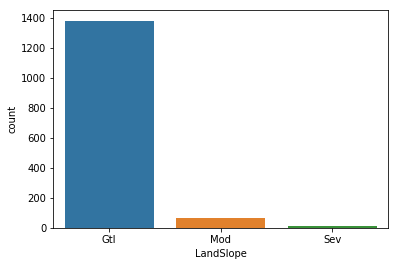

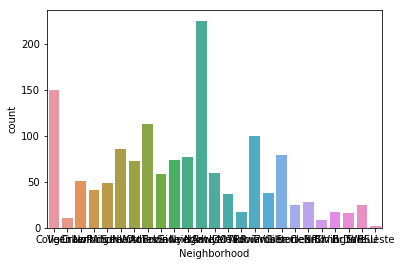

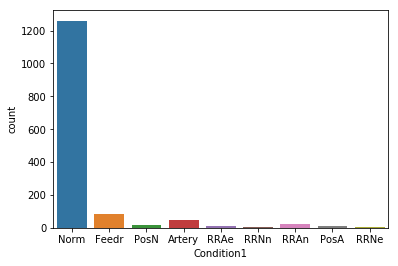

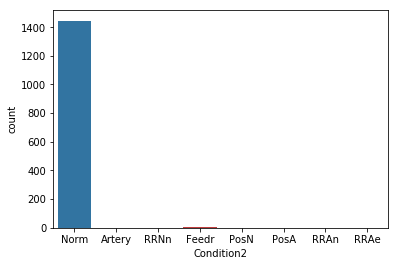

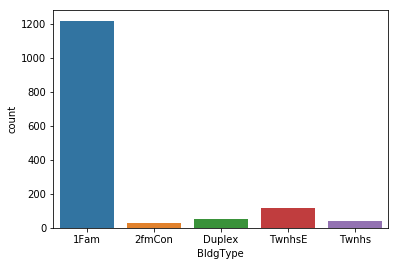

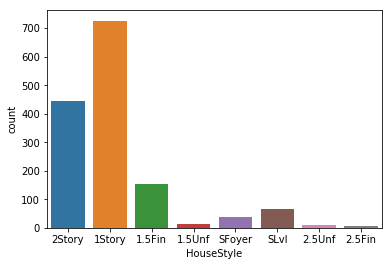

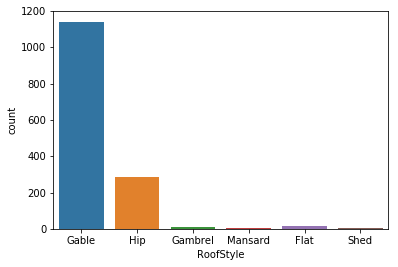

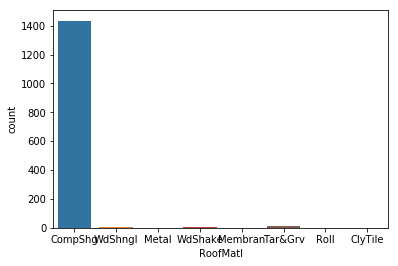

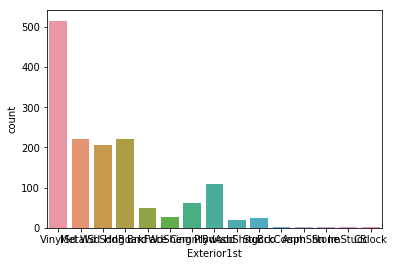

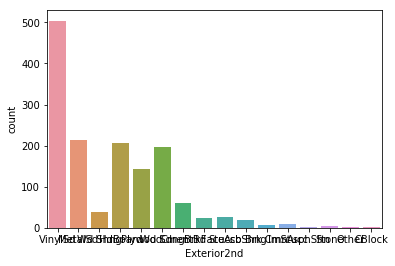

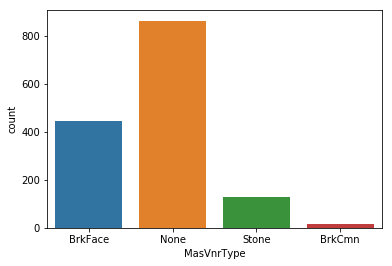

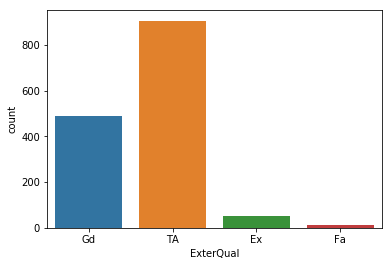

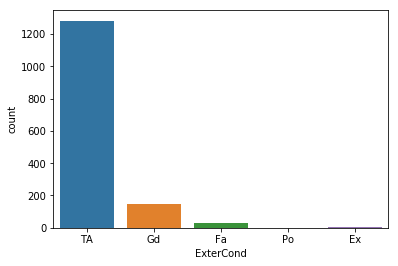

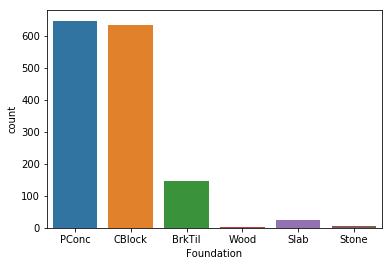

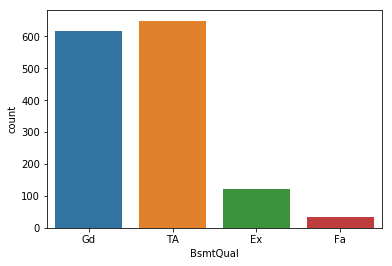

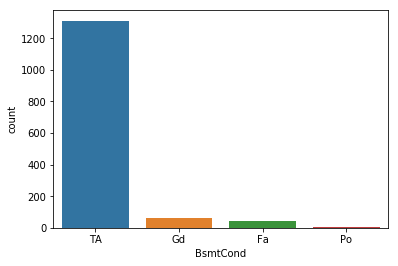

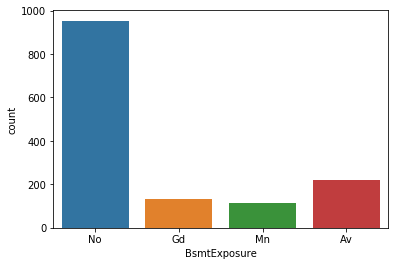

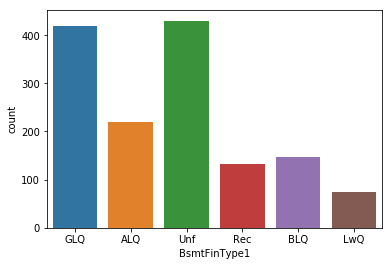

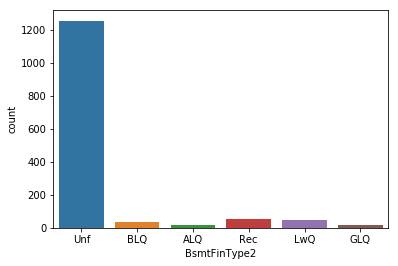

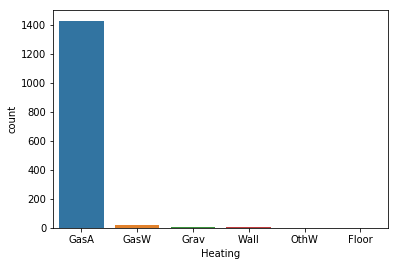

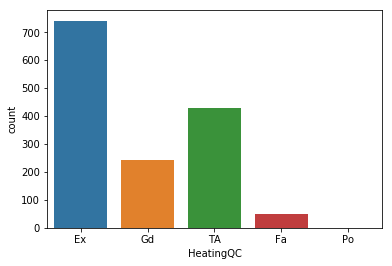

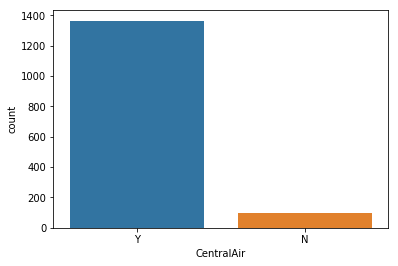

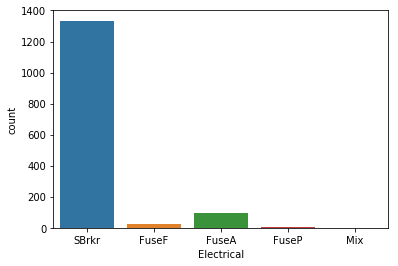

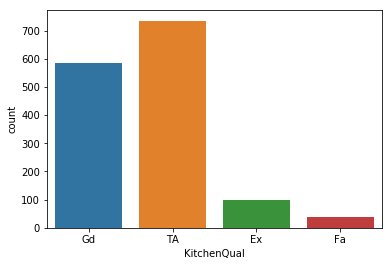

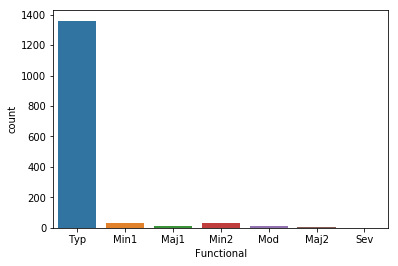

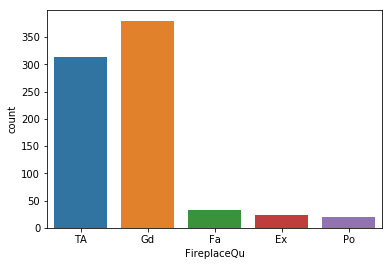

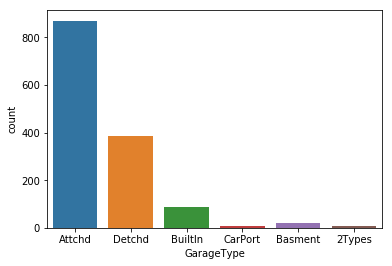

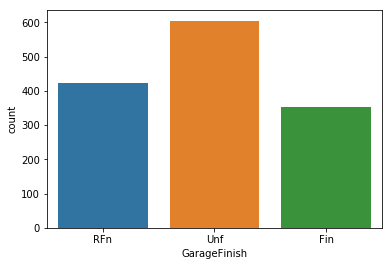

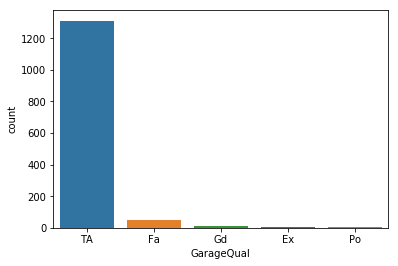

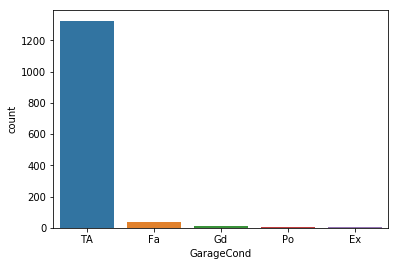

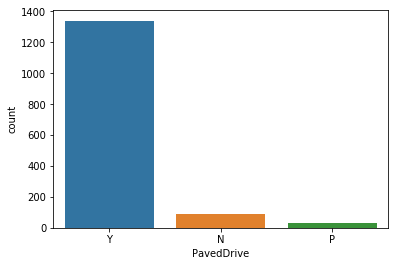

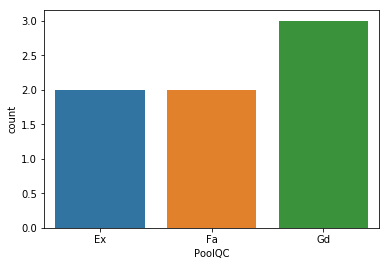

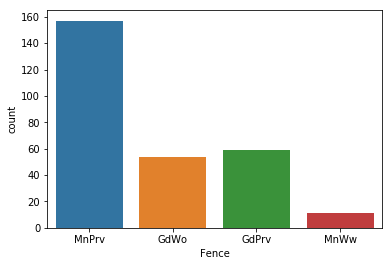

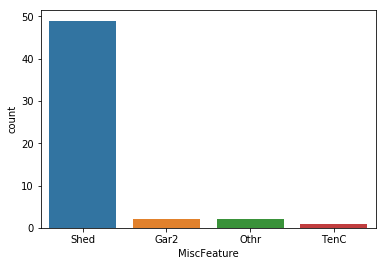

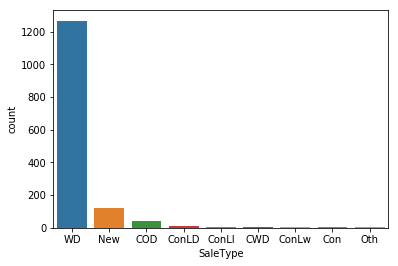

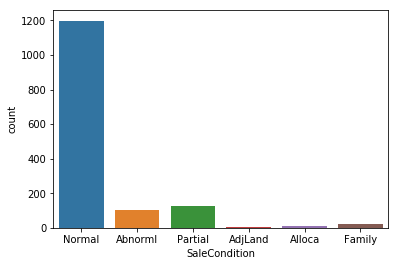

In [19]:
# check the values in the categorical dataset

for f in categorical_data.columns:
    sns.countplot(x = categorical_data[f], data = categorical_data.dropna())
    plt.show()

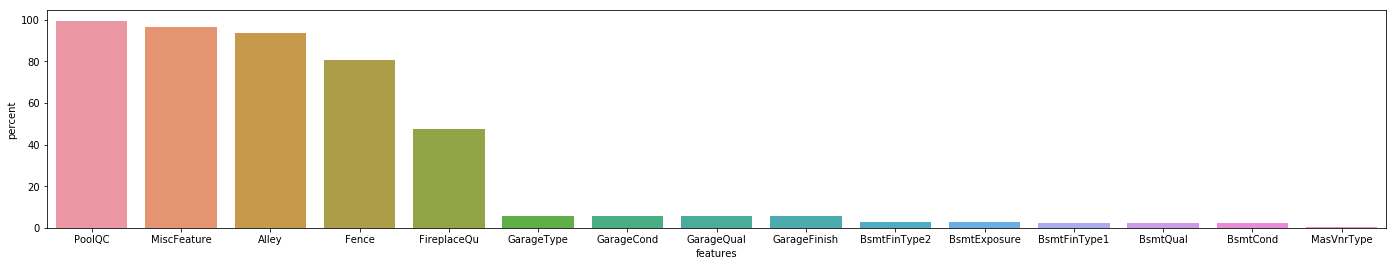

In [20]:
# find proportion of categorical which has missing values

plt.figure(figsize=(24,4))

missing_percent = pd.DataFrame(categorical_data.isnull().sum()*100/categorical_data.shape[0], columns=['percent']).sort_values(by=['percent'],
                                                                ascending=False).head(15).reset_index()

missing_percent.columns = ['features','percent']
sns.barplot(x='features', y='percent', data = missing_percent)

# columns with high proportions of null values can be dropped